<img src="https://pbs.twimg.com/profile_images/793532146984116225/gv1G-BV-.jpg " alt="Drawing" style="width: 75px;" align="left"/>
**   TÜRKİYE KUVVETLİ YER HAREKETİ VERİTABANINDAN ALINAN DEPREM KAYITLARININ İŞLENMESİ PROGRAMI**

_Geliştiren: Dr. Ahmet Anıl Dindar (adindar@gtu.edu.tr) Temmuz 2017_

In [1]:
# MODULE IMPORT
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:95% !important; }</style>"))
from time import gmtime, strftime
import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
# ----------------------------------
if os.path.isfile('earthquake_temp.txt')==1 : os.remove('earthquake_temp.txt') # geçici EQE dosyasını kaldıralım. 
if os.path.isdir("temp_images")==0: os.mkdir('temp_images'); # Geçici şekil klasörünü yaratalım. 
# ----------------------------------
print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) + " Execution Started \n")

------------------------------------------------------------
2017_0723-14:35:43 Execution Started 



In [2]:
file_url = input("Deprem Verisi URL'sini giriniz : ")

Deprem Verisi URL'sini giriniz : http://kyhdata.deprem.gov.tr/2K/genAcc.php?dst=TU9EVUxFX05BTUU9ZXZ0RmlsZSZNT0RVTEVfVEFTSz1kb3dubG9hZCZNT0RVTEVfU1VCVEFTSz1BTEwmTU9EVUxFX1RBUkdFVD1vbGQmVEFSR0VUPTIwMTcwNzIxMDIxMjM1XzQ4MDk%3D


In [3]:
# EQE geçici dosya okuma
import urllib.request
urllib.request.urlretrieve(file_url ,  u'earthquake_temp.txt') ;
lines = [ line.rstrip('\n')  for line in open('earthquake_temp.txt',encoding='Windows-1250')]
# HEADERLARIN DEĞİŞKENLERE ATANMASI
place = lines[1].split(':')[1][1:]
eqe_date = lines[2].split(' ')[-3]
eqe_time = lines[2].split(' ')[-2]
epicenter_coordinates = lines[3].split(':')[1][1:].split('-')
epicenter_latitude, epicenter_longitude = float(epicenter_coordinates[0][0:-1]) , float( epicenter_coordinates[1][0:-1])
eqe_depth = lines[4].split(':')[1][1:]
eqe_magnitude = lines[5].split(':')[1][1:]
station_id = lines[6].split(':')[1][1:]
station_coordinates = lines[7].split(':')[1][1:].split('-')
station_latitude, station_longitude = float(station_coordinates[0][0:-1]) , float( station_coordinates[1][0:-1])
station_altiude = lines[8].split(':')[1][1:]
recorder_type = lines[9].split(':')[1][1:]
recorder_serial_no = lines[10].split(':')[1][1:]
record_date = lines[11].split(' ')[-3]
record_time = lines[11].split(' ')[-2]
number_of_data = int( lines[12].split(':')[1][1:] )
sampling_interval = float( lines[13].split(':')[1][1:] )
raw_PGA_NS = lines[14].split(' ')[-5]
raw_PGA_EW = lines[14].split(' ')[-3]
raw_PGA_UD = lines[14].split(' ')[-1]

print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) + " Başlık okuma tamam \n")

------------------------------------------------------------
2017_0723-14:35:48 Başlık okuma tamam 



------------------------------------------------------------
2017_0723-14:35:50 Harita çizimi tamam 



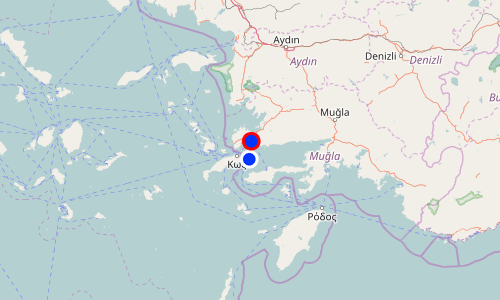

In [4]:
# EPICENTER HARİTASININI ÜRETİLMESİ ve gösterilmesi
from staticmap import StaticMap, CircleMarker, Line
m = StaticMap(500, 300, url_template='http://a.tile.osm.org/{z}/{x}/{y}.png')
marker_outline = CircleMarker((epicenter_longitude , epicenter_latitude), 'white', 18)
marker = CircleMarker((epicenter_longitude , epicenter_latitude), '#0036FF', 12)
m.add_marker(marker_outline)
m.add_marker(marker)

marker_outline = CircleMarker((station_longitude,station_latitude), 'red', 18)
marker = CircleMarker((station_longitude,station_latitude), '#0036FF', 12)
m.add_marker(marker_outline)
m.add_marker(marker)

m.add_line(Line(((epicenter_longitude , epicenter_latitude), (station_longitude,station_latitude)), 'blue', 3))
image = m.render(zoom=7)
image.save('./temp_images'+'/1-epicenter.png')
print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) + " Harita çizimi tamam \n")
from IPython.display import Image
Image(filename='./temp_images/1-epicenter.png') 

In [5]:
# ISTASYON BILGILERININ İNCELENMESİ
time = sampling_interval * np.linspace(0 , number_of_data, num=number_of_data)
# PANDAS ile dosyayı okuma ve data bloğunun işlenmesi
import pandas as pd
data_raw_acceleration = pd.read_csv('earthquake_temp.txt', header=17, delim_whitespace = True , skipfooter=1 , engine='python')
data_raw_acceleration.describe()

,N-S,E-W,U-D
count,3.060000e+03,3.060000e+03,3.060000e+03
mean,8.169935e-09,5.228758e-09,1.960784e-09
std,6.608244e-01,6.511115e-01,3.696467e-01
min,-5.133254e+00,-6.142740e+00,-2.381511e+00
25%,-1.218962e-01,-1.172937e-01,-5.764225e-02
50%,4.720000e-04,-1.270000e-04,7.130000e-04
75%,1.181843e-01,1.156743e-01,6.265425e-02
max,4.635362e+00,5.239005e+00,2.686159e+00


------------------------------------------------------------
2017_0723-14:35:51 Ham ivmeler grafiği tamam 



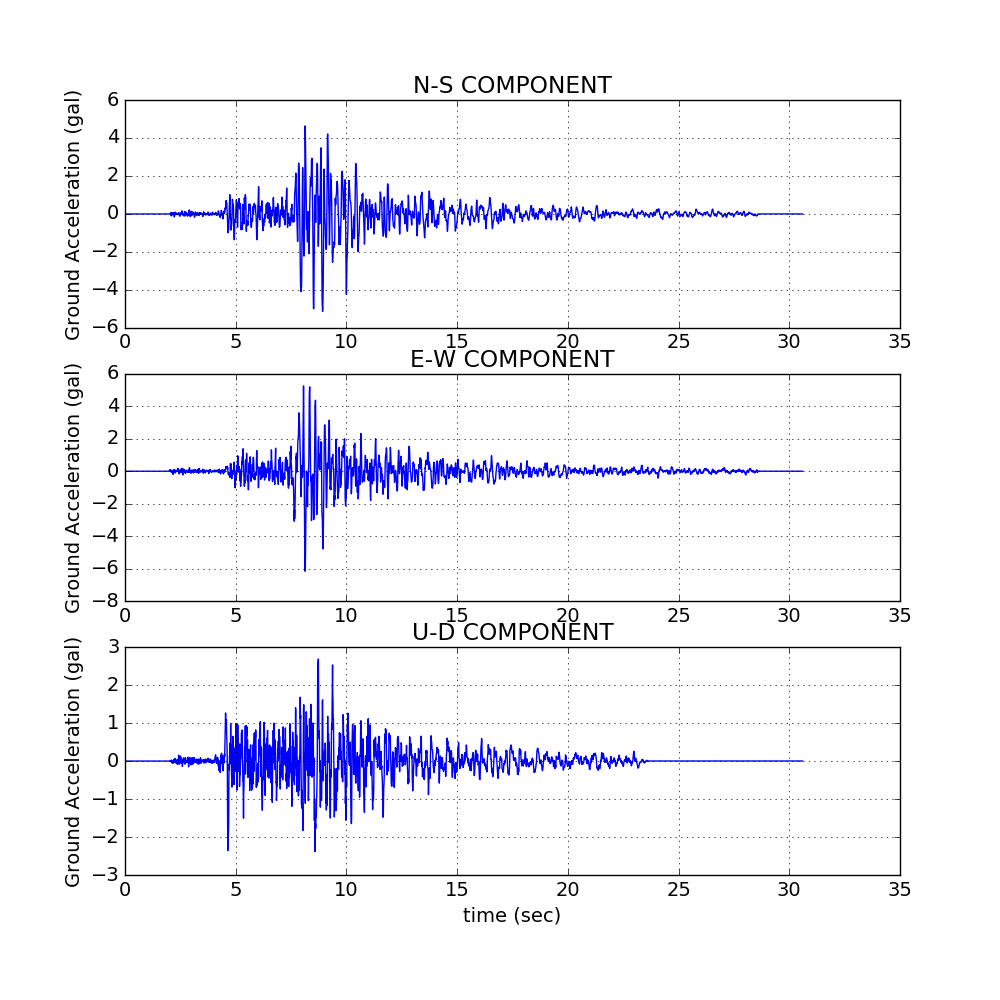

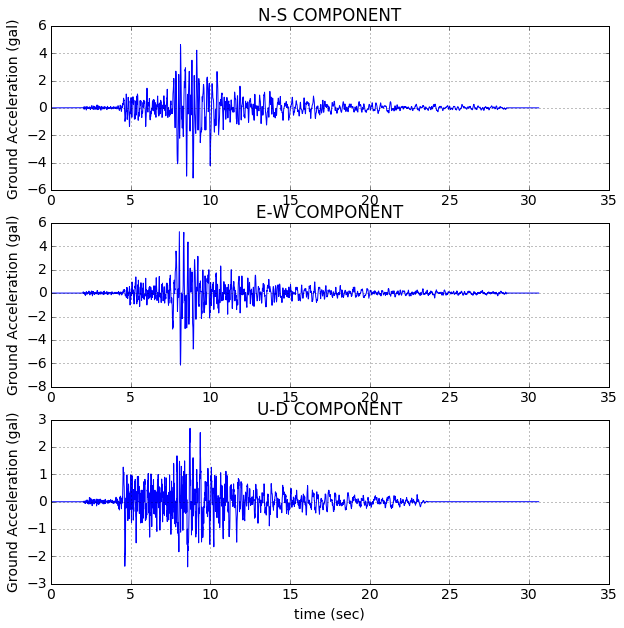

In [6]:
#%% # HER BİR BİLEŞEN İÇİN HESAPLAMANIN YAPILMASI
# Ham ivme grafiklerinin çizilmesi
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=[10,10] )
for counter , dogrultu_ismi in enumerate(['N-S','E-W','U-D']):
    acceleration_ham = data_raw_acceleration[dogrultu_ismi] # Ham ivme verisi
    plt.subplot(3,1,counter+1) , 
    plt.plot(time, acceleration_ham ) 
    plt.grid() ; plt.title(data_raw_acceleration.columns[counter]+' COMPONENT'), 
    if counter == 2: plt.xlabel('time (sec)'); 
    plt.ylabel('Ground Acceleration (gal)')   
plt.savefig('./temp_images/'+'2-ham_veriler.png')
print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) + " Ham ivmeler grafiği tamam \n")
Image(filename='./temp_images/'+'2-ham_veriler.png')

In [7]:
# İVME FİLTRELEME İŞLEMLERİ
#==============================================================================
from scipy import integrate
import numpy as np
import scipy.signal as signal
#==============================================================================

#= FONKSİYONLARIN TANIMLANMASI ==============================================================================
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Sample rate and desired cutoff frequencies (in Hz).
fs = 100
lowcut = .05
highcut = 20.0

def aad_fft(accg,sampling_interval):
    from scipy.fftpack import fft
    import numpy as np
    # Number of sample points
    N = len(accg)
    # sample spacing
    T = sampling_interval
    x = np.linspace(0.0, N*T, N)
    y = accg
    yf = fft(y) # This is the main part
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    amplitudes = 2.0/N * np.abs(yf[0:N//2])
    return(xf , amplitudes)

In [8]:
# TANIMLAMALAR
data_raw_velocity = pd.DataFrame(columns=['N-S','E-W','U-D']) # Bu boş bir dataframe
data_raw_displacement = pd.DataFrame(columns=['N-S','E-W','U-D']) # Bu boş bir dataframe
data_filtered_acceleration = pd.DataFrame(columns=['N-S','E-W','U-D']) # Bu boş bir dataframe
data_filtered_velocity = pd.DataFrame(columns=['N-S','E-W','U-D']) # Bu boş bir dataframe
data_filtered_displacement = pd.DataFrame(columns=['N-S','E-W','U-D']) # Bu boş bir dataframe
data_fft= pd.DataFrame(columns=['Frekans','N-S','E-W','U-D']) # Bu boş bir dataframe
plt.rcParams.update({'font.size': 10})
duration_Arias_intensity = [] # duration değerleri

------------------------------------------------------------
2017_0723-14:35:52 N-S ham veri grafiği tamam

------------------------------------------------------------
2017_0723-14:35:52 N-S filtrelenmişler tamam

------------------------------------------------------------
2017_0723-14:35:53 N-S peak değerlerin indexi

------------------------------------------------------------
2017_0723-14:35:54 N-S PEak değerler tamam

------------------------------------------------------------
2017_0723-14:35:54 N-S FFT tamam

------------------------------------------------------------
2017_0723-14:35:55 N-S Elastik spektrum tamam

------------------------------------------------------------
2017_0723-14:35:55 N-S Arias Süre tamam

------------------------------------------------------------
2017_0723-14:35:56 E-W ham veri grafiği tamam

------------------------------------------------------------
2017_0723-14:35:56 E-W filtrelenmişler tamam

----------------------------------------------------

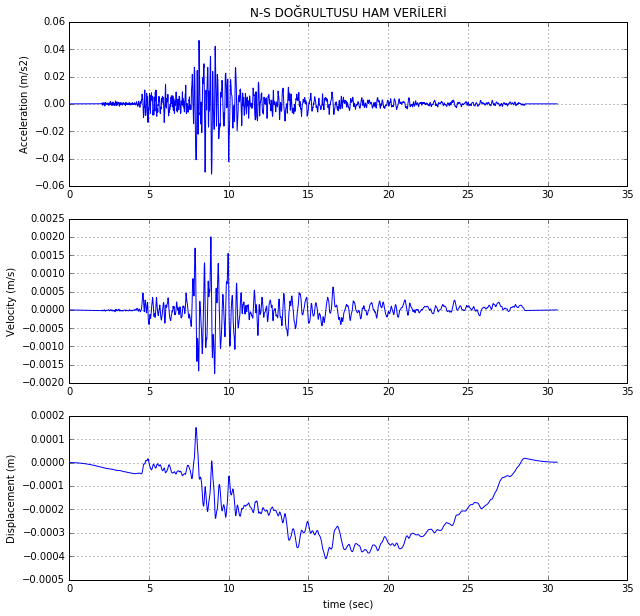

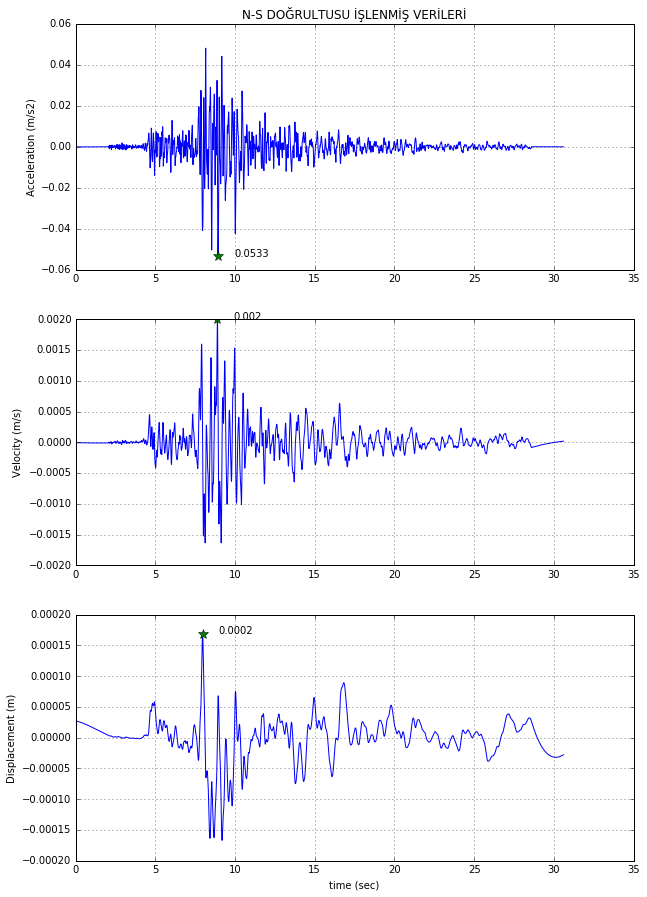

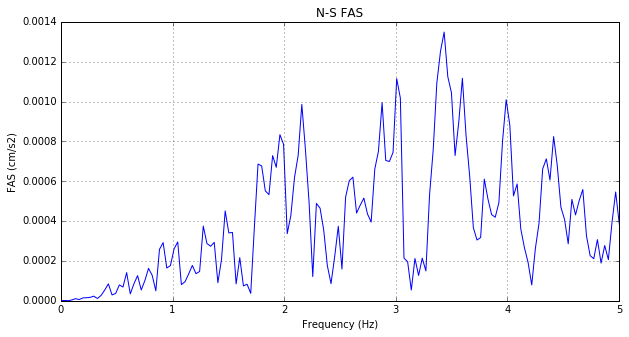

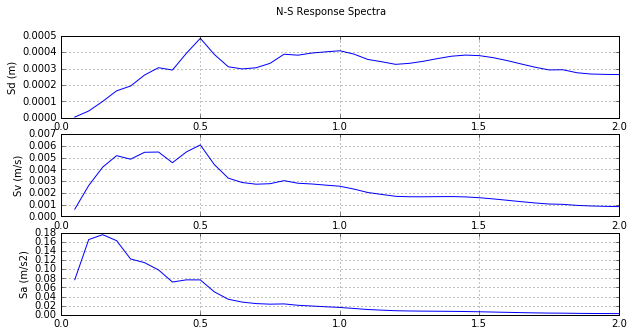

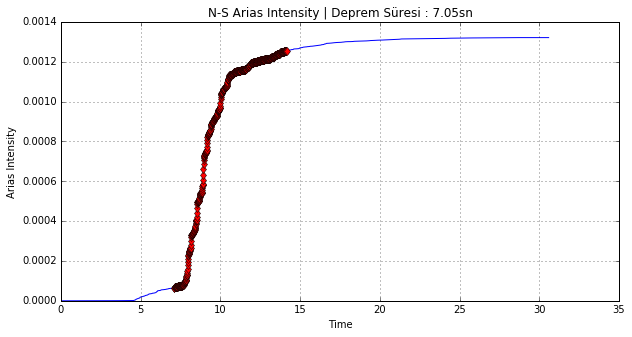

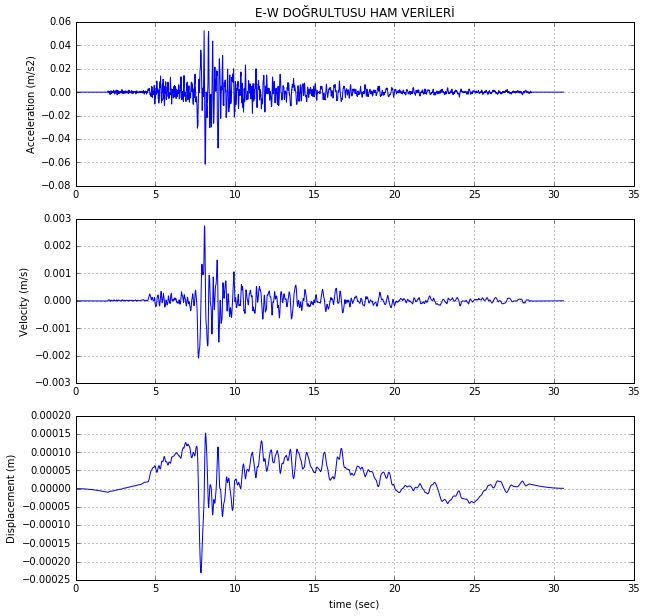

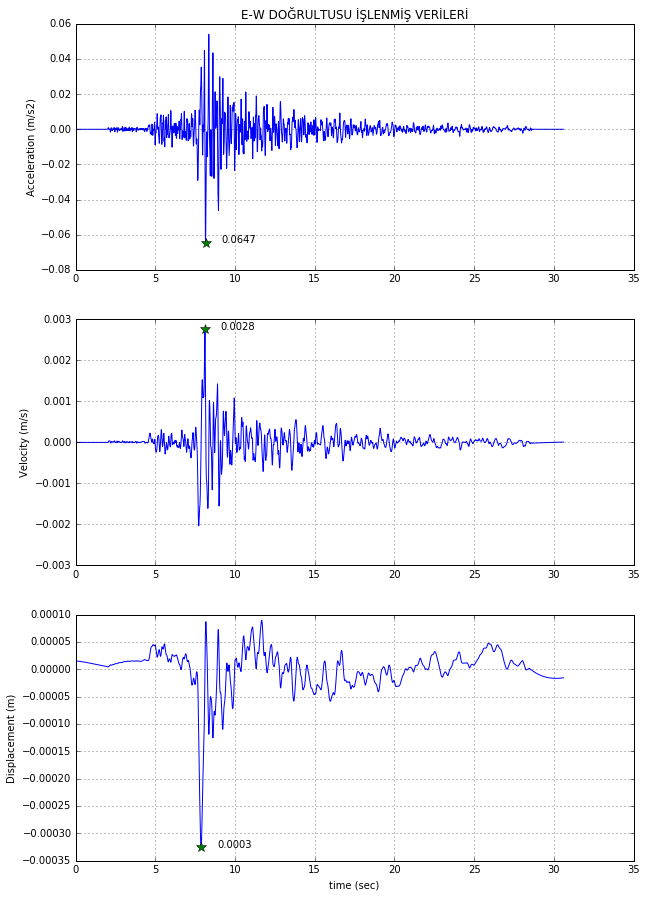

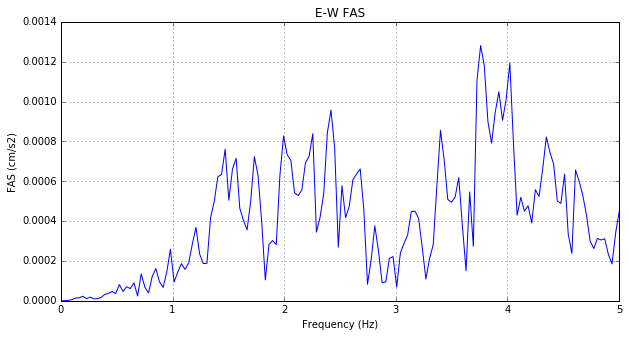

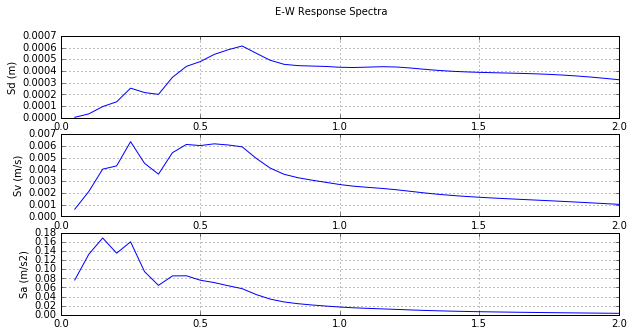

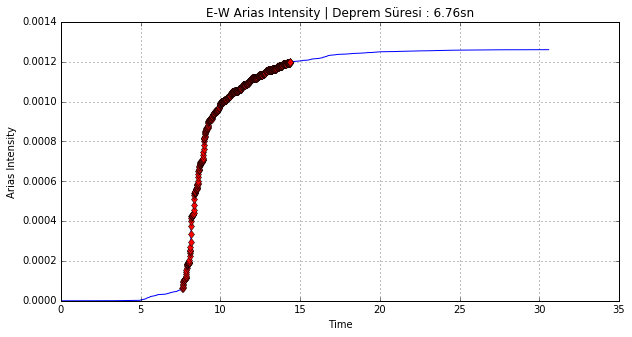

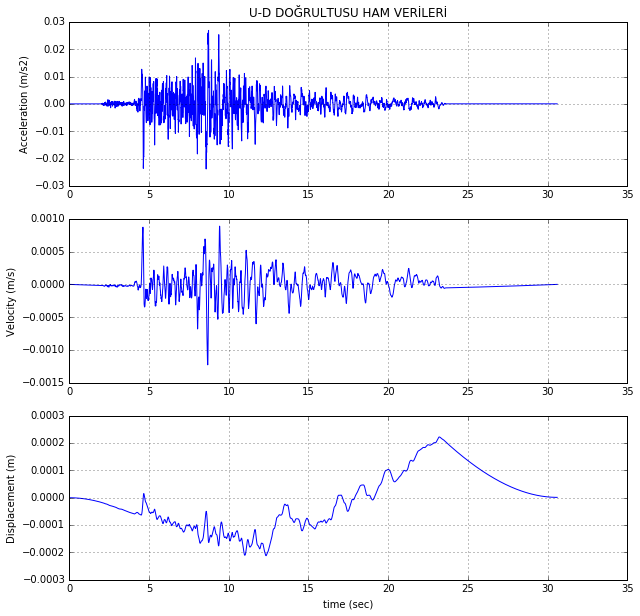

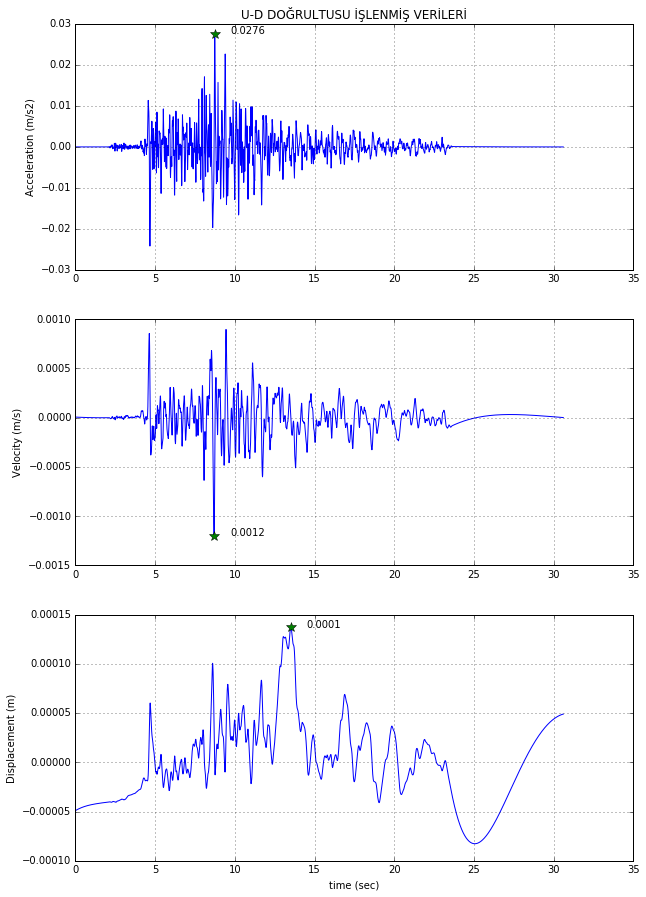

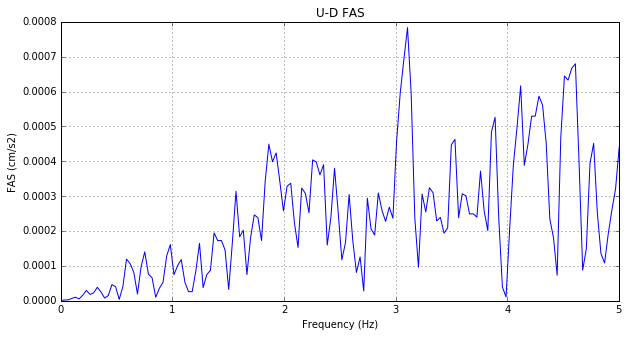

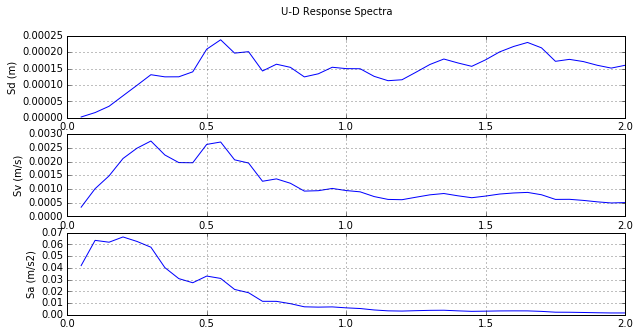

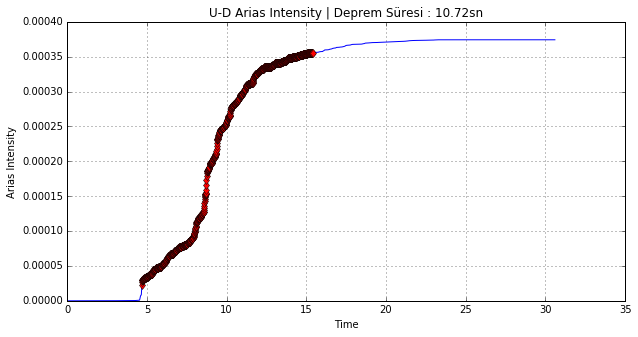

In [9]:
for counter , dogrultu_ismi in enumerate(['N-S','E-W','U-D']):
    #= HAM ZAMAN SERİLERİNİN ÇIKARTILMASI ======================================================================
    acceleration = data_raw_acceleration[dogrultu_ismi] / 100 # Burada birim artık "m/s2" olmaktadır.
#    acceleration = signal.detrend(acceleration, type='linear')

    velocity = sampling_interval * integrate.cumtrapz(acceleration)
    velocity = np.concatenate([[0],velocity]) # Serinin başına bir tane 0 ekledim. 
#    velocity = signal.detrend(velocity, type='linear')
    data_raw_velocity[dogrultu_ismi] = velocity # her bir bileşenin velocity değerini dataframe içne almak

    displacement = sampling_interval * integrate.cumtrapz(velocity)
    displacement = np.concatenate([[0],displacement]) # seinin başına bir tane 0 ekledim.
#    displacement = signal.detrend(displacement, type='linear')
    data_raw_displacement[dogrultu_ismi] = displacement  # her bir bileşenin diplacement değerini dataframe içne almak

    # GORSELLEŞTİRME- HAM BİLEŞENLER
    plt.figure(figsize=[10,10] )

    plt.subplot(3,1,1) , plt.plot(time, acceleration ), plt.ylabel('Acceleration (m/s2)') , plt.grid()
    plt.title(dogrultu_ismi+' DOĞRULTUSU HAM VERİLERİ')
    plt.subplot(3,1,2) , plt.plot(time, velocity), plt.ylabel('Velocity (m/s)') , plt.grid()
    plt.subplot(3,1,3) , plt.plot(time, displacement), plt.ylabel('Displacement (m)') , plt.grid() 
    plt.xlabel('time (sec)');
    plt.savefig('./temp_images/'+'3-'+dogrultu_ismi+' DOĞRULTUSU HAM VERİLERİ.png')
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi +" ham veri grafiği tamam\n")
    Image(filename='./temp_images/'+'3-'+dogrultu_ismi+' DOĞRULTUSU HAM VERİLERİ.png')
    #= FİLTRELENMİŞ ZAMAN SERİLERİNİN ÇIKARTILMASI ======================================================================
    # ŞİMDİ TÜM HAM DEĞERLERİ FİLTRE İLE DÜZELTELİM.
    acceleration_filtered = butter_bandpass_filter(acceleration, lowcut, highcut, fs, order=4) 
    data_filtered_acceleration[dogrultu_ismi] = acceleration_filtered # her bir bileşen dataframe içine alındı

    #velocity = integrate.cumtrapz(acceleration, dx = sampling_interval)
    velocity_filtered = sampling_interval * integrate.cumtrapz(acceleration_filtered)
    velocity_filtered = np.concatenate([[0],velocity_filtered]) # Serinin başına bir tane 0 ekledim. 
    velocity_filtered = signal.detrend(velocity_filtered, type='linear')
    data_filtered_velocity[dogrultu_ismi] = velocity_filtered # her bir bileşen dataframe içine alındı

    #displacement = integrate.cumtrapz(velocity, dx = sampling_interval)
    displacement_filtered = sampling_interval * integrate.cumtrapz(velocity_filtered)
    displacement_filtered = np.concatenate([[0],displacement_filtered]) # seinin başına bir tane 0 ekledim.
    displacement_filtered = signal.detrend(displacement_filtered, type='linear')
    data_filtered_displacement[dogrultu_ismi] = displacement_filtered # her bir bileşen dataframe içine alındı
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " filtrelenmişler tamam\n")
    # PEARK GROUND VALUES 
    # ACCELERATION
    pga_index = [index for index, value in enumerate(acceleration_filtered) if value == max(acceleration_filtered) or value== min(acceleration_filtered)]
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " peak değerlerin indexi\n")

#==============================================================================
#     import numpy as np
#     from libs import detect_peaks    
#     print('Detect peaks with minimum height and distance filters.')
#     indexes = detect_peaks.detect_peaks(acceleration_filtered, mph=7, mpd=2)
#==============================================================================

    def peak_values(zaman, seri):
        seri_abs = abs(seri)
        seri_Peak = max(seri_abs)
        seri_Peak_index = [item for item,deger in enumerate( seri_abs ) if deger == seri_Peak]
        seri_Peak_real_value = seri_Peak * float(np.sign(seri[seri_Peak_index]))
        return(seri_Peak, seri_Peak_index,seri_Peak_real_value)

    # acceleration
    pga_acceleration_filtered, pga_acceleration_filtered_index , pga_acceleration_filtered_real_value = peak_values(time,acceleration_filtered)

    # velocity
    pgv_velocity_filtered, pgv_velocity_filtered_index , pgv_velocity_filtered_real_value = peak_values(time,velocity_filtered)

    # displacement
    pgd_displacement_filtered, pgd_displacement_filtered_index , pgd_displacement_filtered_real_value = peak_values(time,displacement_filtered)


    # GORSELLEŞTİRME- FİLTRELENMİŞ BİLEŞENLER
    plt.figure(figsize=[10,15] )    

    plt.subplot(3,1,1) , plt.plot(time, acceleration_filtered, time[pga_acceleration_filtered_index], pga_acceleration_filtered_real_value,'*', markersize=10), plt.ylabel('Acceleration (m/s2)') , plt.grid()
    plt.text( time[pga_acceleration_filtered_index]+1, pga_acceleration_filtered_real_value , str(abs(round(pga_acceleration_filtered,4) )))
    plt.title(dogrultu_ismi+' DOĞRULTUSU İŞLENMİŞ VERİLERİ')

    plt.subplot(3,1,2) , plt.plot(time, velocity_filtered , time[pgv_velocity_filtered_index], pgv_velocity_filtered_real_value,'*', markersize=10), plt.ylabel('Velocity (m/s)') , plt.grid()
    plt.text( time[pgv_velocity_filtered_index]+1, pgv_velocity_filtered_real_value , str(abs(round(pgv_velocity_filtered,4) )))

    plt.subplot(3,1,3) , plt.plot(time, displacement_filtered, time[pgd_displacement_filtered_index], pgd_displacement_filtered_real_value,'*', markersize=10), plt.ylabel('Displacement (m)') , plt.grid() 
    plt.text( time[pgd_displacement_filtered_index]+1, pgd_displacement_filtered_real_value , str(abs(round(pgd_displacement_filtered,4) )))
    plt.xlabel('time (sec)');
    plt.savefig('./temp_images/'+'4-'+dogrultu_ismi+' DOĞRULTUSU İŞLENMİŞ VERİLERİ.png')
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " PEak değerler tamam\n")
    Image(filename='./temp_images/'+'4-'+dogrultu_ismi+' DOĞRULTUSU İŞLENMİŞ VERİLERİ.png')
    #= FREKANS DEĞERLERİNİN BELİRLENMESİ ======================================================================    
    xf, amplitudes = aad_fft(acceleration_filtered , sampling_interval)

    data_fft['Frekans'] = xf # FFT değerlerini bir dataframe içine yazdım. 
    data_fft[dogrultu_ismi] = amplitudes

    # Gorselleştirmesi
    plt.figure(figsize=[10,5])
    plt.plot(xf, amplitudes); plt.grid();plt.xlabel('Frequency (Hz)'); plt.ylabel('FAS (cm/s2)')
    plt.title(dogrultu_ismi+' FAS')
    plt.xlim([0,max(xf)/10]) # BURADAKİ 20 DEĞERİ SALLAMADIR, DÜZELTİLMELİDİR. 
    plt.savefig('./temp_images/'+'5-'+ dogrultu_ismi+' FAS verileri.png' )
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " FFT tamam\n")
    Image(filename='./temp_images/'+'5-'+ dogrultu_ismi+' FAS verileri.png')
    #= ELASTİK TEPKİ SPECTRUMUNUN BELİRLENMESİ ======================================================================        
    acceleration_filtered_list = list( acceleration_filtered)
    time_list = list(time)
    damping_ratio = 0.05
    Sd = []
    Sv = []
    Sa = []
    acceleration_filtered_list
    T = np.arange(0.05, 2.05,.05)
    for i in T:
        omega = 2*np.pi/i 
        mass = 1 
        k = ((omega)**2)*mass
        c = 2*mass*omega*damping_ratio
        K = k+3*c/sampling_interval + 6*mass/(sampling_interval**2)
        a = 6*mass / sampling_interval + 3*c
        b = 3*mass + sampling_interval*c/2
        u= [0]
        v= [0]
        ac= [0] # INITIAL CONDITIONS
        for j in range(len(acceleration_filtered_list)-1) :
            df = - ( acceleration_filtered_list[j+1] - acceleration_filtered_list[j])+ a*v[j] + b*ac[j] # delta force
            du = df / K
            dv = 3*du / sampling_interval - 3*v[j] - sampling_interval * ac[j] /2    
            dac = 6* (du - sampling_interval*v[j]) / (sampling_interval**2) - 3* ac[j]
            u.append(u[j] + du)
            v.append(v[j] + dv)
            ac.append(ac[j] + dac)
        Sd.append(max([abs(x) for x in u]))
        #Sv.append(max([abs(x) for x in v]))
        #Sa.append(max([abs(x) for x in ac]))
        Sv.append(Sd[-1]*omega)
        Sa.append(Sd[-1]*omega**2)

    # Gorselleştirmesi   
    plt.figure(figsize=[10,5] );
    plt.suptitle(dogrultu_ismi+' Response Spectra' )
    plt.subplot(3,1,1),plt.plot(T,Sd) ; plt.ylabel('Sd (m)') ; plt.grid()
    plt.subplot(3,1,2),plt.plot(T,Sv) ; plt.ylabel('Sv (m/s)'); plt.grid()
    plt.subplot(3,1,3),plt.plot(T,Sa) ; plt.ylabel('Sa (m/s2)'); plt.grid()  
    plt.savefig('./temp_images/'+'6-'+ dogrultu_ismi+' Tepki Spektrumu Verileri.png' )
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " Elastik spektrum tamam\n")
    Image(filename='./temp_images/'+'6-'+ dogrultu_ismi+' Tepki Spektrumu Verileri.png' )
    #= ARIAS INTENSITY BELİRLENMESİ ======================================================================       
    acc_kare = [veri**2 for veri in acceleration_filtered_list]
    arias_intensity = []
    for counter, veri in enumerate( acceleration_filtered_list) :
        arias_intensity = sampling_interval* integrate.cumtrapz(acc_kare[:counter])
    # Sürenin hesaplanması
    # Arias Intensity Süre
    arias_05 = 0.05*arias_intensity[-1]
    arias_95 = 0.95*arias_intensity[-1]
    time_arias_list = [index for index,value in enumerate(arias_intensity) if value > 0.05*arias_intensity[-1] and value < 0.95*arias_intensity[-1] ]    
    duration_Arias_intensity.append( time[time_arias_list[-1]] - time[time_arias_list[0]] )# Arias Intensity Esaslı Geçen Süre        
    # Gorselleştirmesi
    plt.figure(figsize=[10,5] );    
    plt.plot(time[1:-1] , arias_intensity,'b', time[ time_arias_list] , arias_intensity[time_arias_list],'rd'); 
    plt.grid(), plt.xlabel('Time'), plt.ylabel('Arias Intensity'), 
    plt.title(dogrultu_ismi+' Arias Intensity | Deprem Süresi : '+ str(round( duration_Arias_intensity[-1],2) ) + 'sn');    
    plt.savefig('./temp_images/'+'7-'+dogrultu_ismi+' Arias Intensity.png');    
    print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) +" "+ dogrultu_ismi + " Arias Süre tamam\n")
    Image(filename='./temp_images/'+'7-'+dogrultu_ismi+' Arias Intensity.png')
print( strftime("%Y_%m%d-%H:%M:%S", gmtime()) + " Execution Ended\n"+'-'*60)  

In [10]:
listem = [item for item in  os.listdir('./temp_images/') if item.endswith('.png')]
print( strftime('-'*60+ "\n%Y_%m%d-%H:%M:%S", gmtime()) + " Raporlama Başladı\n")         
#==============================================================================
from time import gmtime, strftime
import os
import datetime
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
#==============================================================================
document = Document()

sections = document.sections
section = sections[0] 
section.left_margin, section.right_margin , section.top_margin, section.bottom_margin = 701901,701901,701901,701901

listem = [item for item in  os.listdir('./temp_images/') if item.endswith('.png')]
listem.sort()

# Kapak Sayfası Ekleme

document.add_picture('gtuinsaat_logo.jpg', width=Inches(2))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

[document.add_paragraph('') for i in range(4)]

document.add_paragraph(eqe_date + " "+eqe_time+ " Tarihinde Oluşan Depremin \n\n"+ place +'\n\n İstasyonunda Kaydedilen Yer Hareketinin İnceleme Raporudur\n')
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

[document.add_paragraph('') for i in range(10)]

document.add_paragraph( datetime.datetime.today().strftime('%Y_%m%d'))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER 

document.add_page_break()

# İçindekiler Sayfası
p = document.add_paragraph('İçindekiler')
p = document.add_paragraph('\n1- Deprem Bilgileri\n2- İstasyon Bilgileri\n3- Kayıt Bileşenleri (Ham)\n4- Filtreleme İşlemleri\n5- Filtrelenmiş Kayıt Bileşenleri\n6- Frekans Alan Hesapları\n7- Tepki Spektrumu\n8- Kayıt Karakteristik Değerleri')

document.add_page_break()

# 1- Deprem Bilgileri
document.add_heading('1- Deprem Bilgileri', level=2)

document.add_picture('./temp_images/'+listem[0], width=Inches(5))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

table = document.add_table(rows=5, cols=2)
table.style = 'LightShading-Accent1'
row = table.rows[0] ; row.cells[0].text = 'ÖZELLİKLER'; row.cells[1].text = 'DEĞERLER'
row = table.rows[1] ; row.cells[0].text = 'EARTHQUAKE DATE'; row.cells[1].text = eqe_date +" - "+ eqe_time
row = table.rows[2] ; row.cells[0].text = 'EPICENTER COORDINATES'; row.cells[1].text = epicenter_coordinates[0]+" "+epicenter_coordinates[1]
row = table.rows[3] ; row.cells[0].text = 'EARTHQUAKE DEPTH (km)'; row.cells[1].text = eqe_depth
row = table.rows[4] ; row.cells[0].text = 'EARTHQUAKE MAGNITUDE'; row.cells[1].text = eqe_magnitude

# 2- İstasyon Bilgileri
document.add_heading('2- İstasyon Bilgileri', level=2)

table = document.add_table(rows=9, cols=2)
table.style = 'LightShading-Accent1'
row = table.rows[0] ; row.cells[0].text = 'ÖZELLİKLER'; row.cells[1].text = 'DEĞERLER'
row = table.rows[1] ; row.cells[0].text = 'STATION ID'; row.cells[1].text = station_id
row = table.rows[2] ; row.cells[0].text = 'STATION COORDINATES'; row.cells[1].text = station_coordinates[0]+" "+station_coordinates[1]
row = table.rows[3] ; row.cells[0].text = 'STATION ALTITUDE (m)'; row.cells[1].text = station_altiude
row = table.rows[4] ; row.cells[0].text = 'RECORDER TYPE'; row.cells[1].text = recorder_type
row = table.rows[5] ; row.cells[0].text = 'RECORDER SERIAL NO'; row.cells[1].text = recorder_serial_no
row = table.rows[6] ; row.cells[0].text = 'RECORD TIME'; row.cells[1].text = record_date+ " - "+ record_time
row = table.rows[7] ; row.cells[0].text = 'NUMBER OF DATA'; row.cells[1].text = str(number_of_data)
row = table.rows[8] ; row.cells[0].text = 'SAMPLING INTERVAL (sec)'; row.cells[1].text = str( sampling_interval )

document.add_page_break()

# 3- Kayıt Bileşenleri (Ham)
document.add_heading('3- Kayıt Bileşenleri (Ham)', level=2) 

document.add_picture('./temp_images/'+listem[1], width=Inches(5))
last_paragraph = document.paragraphs[-1] 
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

document.add_page_break()

# 4- Filtreleme İşlemleri
document.add_heading('4- Filtreleme İşlemleri', level=2) 

for i in range(3):
    p = document.add_paragraph(listem[2+i][2:-4])
    document.add_picture('./temp_images/'+listem[2+i], width=Inches(4))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

document.add_page_break()

# 5- Filtrelenmiş Kayıt Bileşenleri
document.add_heading('5- Filtrelenmiş Kayıt Bileşenleri', level=2) 

for i in range(3):
    p = document.add_paragraph(listem[5+i][2:-4])
    document.add_picture('./temp_images/'+listem[5+i], width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

document.add_page_break()

# 6- Frekans Alan Hesapları
document.add_heading('6- Frekans Alan Hesapları', level=2) 

for i in range(3):
    p = document.add_paragraph(listem[8+i][2:-4])
    document.add_picture('./temp_images/'+listem[8+i], width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

document.add_page_break()

# 7- Tepki Spektrumu
document.add_heading('7- Tepki Spektrumu', level=2) 

for i in range(3):
    p = document.add_paragraph(listem[11+i][2:-4])
    document.add_picture('./temp_images/'+listem[11+i], width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

document.add_page_break()

# 8- Kayıt Karakteristik Değerleri
document.add_heading('8- Kayıt Karakteristik Değerleri', level=2) 

# Hesaplanan süre Tablosu
table = document.add_table(rows=4, cols=2)
table.style = 'LightShading-Accent1'
row = table.rows[0] ; row.cells[0].text = 'DOĞRULTULAR'; row.cells[1].text = 'EFEKTİF SÜRE (sn)'
row = table.rows[1] ; row.cells[0].text = 'E-W'; row.cells[1].text = str( duration_Arias_intensity[0] )
row = table.rows[2] ; row.cells[0].text = 'N-S'; row.cells[1].text = str( duration_Arias_intensity[1] )
row = table.rows[3] ; row.cells[0].text = 'U-D'; row.cells[1].text = str( duration_Arias_intensity[2] )


for i in range(3):
    p = document.add_paragraph(listem[14+i][2:-4])
    document.add_picture('./temp_images/'+listem[14+i], width=Inches(5))
    last_paragraph = document.paragraphs[-1] 
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER


# Dökümanı Saklama Zamanı

report_name = "".join(i for i in eqe_date if i in "0123456789") + "".join(i for i in eqe_time if i in "0123456789") +"_"+ "".join(i for i in station_id if i in "0123456789")
WORD_report_name = (datetime.datetime.today().strftime('%Y_%m%d') +"-"+report_name+'- RAPOR.docx')
document.save( WORD_report_name  )

print( strftime("\n%Y_%m%d-%H:%M:%S", gmtime()) + " Rapor Bitti\n"+'-'*60)
print( strftime("\n%Y_%m%d-%H:%M:%S", gmtime()) + " Görmek İçin Klikleyiniz\n"+'-'*60)

------------------------------------------------------------
2017_0723-14:36:06 Raporlama Başladı


2017_0723-14:36:06 Rapor Bitti
------------------------------------------------------------

2017_0723-14:36:06 Görmek İçin Klikleyiniz
------------------------------------------------------------


/usr/local/lib/python3.5/dist-packages/docx/styles/styles.py:54: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  warn(msg, UserWarning)


In [11]:
from IPython.display import FileLink, FileLinks
print( strftime('-'*60+"\n%Y_%m%d-%H:%M:%S", gmtime()) + " Görmek İçin Klikleyiniz\n")
FileLink(WORD_report_name)

------------------------------------------------------------
2017_0723-14:36:06 Görmek İçin Klikleyiniz



/home/ahmetanildindar/notebooks/3_KYH_processor/2017_0723-20170721021235_4809- RAPOR.docx

In [12]:
os.rename('earthquake_temp.txt', report_name+'.dat')
[os.remove('./temp_images/'+item) for item in listem] ;
os.removedirs('temp_images');